In [130]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [23]:
plt.rcParams["figure.figsize"] = (18,10)

In [2]:
pd.set_option('display.max_columns', 23)

In [3]:
df = pd.read_excel(r"C:\Users\Murilo\Desktop\01 - portfolio and repository\Acme Aero\files\aero_aeronave.xlsx")
df.head()

,codigo_ocorrencia2,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
0,39115,PTNQX,***,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-711A,P28R,PISTÃO,MONOMOTOR,1202,1202,4.0,1979.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,BRIGADEIRO ARARIPE MACEDO,CORRENTINA,DECOLAGEM,PRIVADA,SUBSTANCIAL,0
1,39155,PTLVI,***,AVIÃO,BEECH AIRCRAFT,C90,BE9L,TURBOÉLICE,BIMOTOR,4377,4377,8.0,1979.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,PRIVADA,NENHUM,0
2,39156,PPPTO,***,AVIÃO,AEROSPATIALE AND ALENIA,ATR-72-212A,AT72,TURBOÉLICE,BIMOTOR,22500,22500,73.0,2008.0,BRASIL,BRASIL,AVIÃO,REGULAR,AFONSO PENA,ADALBERTO MENDES DA SILVA,ARREMETIDA NO AR,REGULAR,LEVE,0
3,39158,PRLGJ,REGULAR,AVIÃO,BOEING COMPANY,757-225,B752,JATO,BIMOTOR,108862,108862,5.0,1984.0,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,SUBIDA,REGULAR,NENHUM,0
4,39176,PRMAA,REGULAR,AVIÃO,AIRBUS INDUSTRIE,A320-232,A320,JATO,BIMOTOR,77000,77000,184.0,2001.0,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,SUBIDA,REGULAR,NENHUM,0


In [4]:
df.tail()

,codigo_ocorrencia2,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
5816,79802,PRGUF,***,AVIÃO,BOEING COMPANY,737-8EH,B738,JATO,BIMOTOR,70533,70533,193.0,2010.0,BRASIL,BRASIL,AVIÃO,REGULAR,SANTOS DUMONT,TANCREDO NEVES,SUBIDA,REGULAR,NENHUM,0
5817,79804,PRAJZ,***,***,BOEING COMPANY,737-48E,B734,JATO,BIMOTOR,65090,65090,NaN,NaN,BRASIL,BRASIL,***,REGULAR,EDUARDO GOMES,VIRACOPOS,DESCIDA,REGULAR,NENHUM,0
5818,79824,PRALA,***,AVIÃO,PIPER AIRCRAFT,PA-25-235,PA25,PISTÃO,MONOMOTOR,1315,1315,1.0,0.0,BRASIL,BRASIL,AVIÃO,AGRÍCOLA,RIO PARANAÍBA,RIO PARANAÍBA,MANOBRA,AGRÍCOLA,SUBSTANCIAL,0
5819,79844,PRJBP,***,HELICÓPTERO,SIKORSKY AIRCRAFT,S-92A,S92,TURBOEIXO,BIMOTOR,12020,12020,NaN,NaN,BRASIL,BRASIL,HELICÓPTERO,TÁXI AÉREO,JACAREPAGUÁ,FORA DE AERODROMO,CRUZEIRO,TÁXI AÉREO,NENHUM,0
5820,79874,*****,***,***,FABRICANTE DESCONHECIDO,MODELO DESCONHECIDO,***,***,***,0,0,NaN,NaN,BRASIL,BRASIL,***,EXPERIMENTAL,FORA DE AERODROMO,FORA DE AERODROMO,INDETERMINADA,EXPERIMENTAL,SUBSTANCIAL,1


In [5]:
df.shape

(5821, 23)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5821 entries, 0 to 5820
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   codigo_ocorrencia2           5821 non-null   int64  
 1   aeronave_matricula           5821 non-null   object 
 2   aeronave_operador_categoria  5821 non-null   object 
 3   aeronave_tipo_veiculo        5821 non-null   object 
 4   aeronave_fabricante          5821 non-null   object 
 5   aeronave_modelo              5821 non-null   object 
 6   aeronave_tipo_icao           5821 non-null   object 
 7   aeronave_motor_tipo          5821 non-null   object 
 8   aeronave_motor_quantidade    5821 non-null   object 
 9   aeronave_pmd                 5821 non-null   int64  
 10  aeronave_pmd_categoria       5821 non-null   int64  
 11  aeronave_assentos            5670 non-null   float64
 12  aeronave_ano_fabricacao      5671 non-null   float64
 13  aeronave_pais_fabr

In [7]:
df.describe(percentiles=[.01,.1,.25,.45,.5,.75,.9,.99,.999])

,codigo_ocorrencia2,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_fatalidades_total
count,5821.000000,5821.000000,5821.000000,5670.000000,5671.000000,5821.00000
mean,58556.891771,15401.771345,15401.771345,28.424868,1900.620702,0.15049
std,14060.996211,35474.222942,35474.222942,55.406857,435.939759,0.68290
min,39115.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1%,39988.800000,0.000000,0.000000,0.000000,0.000000,0.00000
10%,43793.000000,660.000000,660.000000,1.000000,1970.000000,0.00000
25%,46413.000000,1158.000000,1158.000000,2.000000,1978.000000,0.00000
45%,51569.000000,1800.000000,1800.000000,5.000000,1990.000000,0.00000
50%,52698.000000,2073.000000,2073.000000,6.000000,1993.000000,0.00000
75%,77667.000000,6033.000000,6033.000000,11.000000,2008.000000,0.00000


In [8]:
df.describe(include="object").T

,count,unique,top,freq
aeronave_matricula,5821,4250,*****,13
aeronave_operador_categoria,5821,12,***,2793
aeronave_tipo_veiculo,5821,10,AVIÃO,4683
aeronave_fabricante,5821,239,CESSNA AIRCRAFT,903
aeronave_modelo,5821,802,ATR-72-212A,189
aeronave_tipo_icao,5821,236,PA34,421
aeronave_motor_tipo,5821,6,PISTÃO,3248
aeronave_motor_quantidade,5821,6,MONOMOTOR,2959
aeronave_pais_fabricante,5821,22,BRASIL,5709
aeronave_pais_registro,5821,22,BRASIL,5709


### Data Cleaning
De acordo com a análise primária feita no primeiro notebook

In [9]:
df.isnull().sum()

codigo_ocorrencia2               0
aeronave_matricula               0
aeronave_operador_categoria      0
aeronave_tipo_veiculo            0
aeronave_fabricante              0
aeronave_modelo                  0
aeronave_tipo_icao               0
aeronave_motor_tipo              0
aeronave_motor_quantidade        0
aeronave_pmd                     0
aeronave_pmd_categoria           0
aeronave_assentos              151
aeronave_ano_fabricacao        150
aeronave_pais_fabricante         0
aeronave_pais_registro           0
aeronave_registro_categoria      0
aeronave_registro_segmento       0
aeronave_voo_origem              0
aeronave_voo_destino             0
aeronave_fase_operacao           0
aeronave_tipo_operacao           0
aeronave_nivel_dano              0
aeronave_fatalidades_total       0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df = df.dropna() 

In [61]:
df["aeronave_assentos"].value_counts(normalize=True)*100

6.0      17.086586
2.0      15.312278
4.0      12.029808
1.0      10.095813
7.0       5.837473
           ...    
243.0     0.017743
312.0     0.017743
242.0     0.017743
230.0     0.017743
108.0     0.017743
Name: aeronave_assentos, Length: 87, dtype: float64

In [15]:
df.loc[df["aeronave_ano_fabricacao"] == 9999]

,codigo_ocorrencia2,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
4094,66826,PUCCO,***,ULTRALEVE,NORTH LAND,NORTH LAND PA-18,ULAC,PISTÃO,***,750,750,2.0,9999,BRASIL,BRASIL,ULTRALEVE,EXPERIMENTAL,FORA DE AERODROMO,FORA DE AERODROMO,INDETERMINADA,PRIVADA,NENHUM,0


In [17]:
df["aeronave_operador_categoria"].value_counts(normalize=True)*100

***                       47.782115
REGULAR                   15.259049
PARTICULAR                12.491128
TÁXI AÉREO                 8.569908
INSTRUÇÃO                  6.795600
EXPERIMENTAL               5.748758
ADMINISTRAÇÃO DIRETA       1.792051
ESPECIALIZADA              0.709723
AGRÍCOLA                   0.408091
NÃO REGULAR                0.266146
MÚLTIPLA                   0.159688
ADMINISTRAÇÃO INDIRETA     0.017743
Name: aeronave_operador_categoria, dtype: float64

In [18]:
df.loc[df["aeronave_operador_categoria"] == "***"]

,codigo_ocorrencia2,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
0,39115,PTNQX,***,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-711A,P28R,PISTÃO,MONOMOTOR,1202,1202,4.0,1979,BRASIL,BRASIL,AVIÃO,PARTICULAR,BRIGADEIRO ARARIPE MACEDO,CORRENTINA,DECOLAGEM,PRIVADA,SUBSTANCIAL,0
1,39155,PTLVI,***,AVIÃO,BEECH AIRCRAFT,C90,BE9L,TURBOÉLICE,BIMOTOR,4377,4377,8.0,1979,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,PRIVADA,NENHUM,0
2,39156,PPPTO,***,AVIÃO,AEROSPATIALE AND ALENIA,ATR-72-212A,AT72,TURBOÉLICE,BIMOTOR,22500,22500,73.0,2008,BRASIL,BRASIL,AVIÃO,REGULAR,AFONSO PENA,ADALBERTO MENDES DA SILVA,ARREMETIDA NO AR,REGULAR,LEVE,0
6,39235,PTWKN,***,AVIÃO,CESSNA AIRCRAFT,A188B,C188,PISTÃO,MONOMOTOR,1497,1497,1.0,1976,BRASIL,BRASIL,AVIÃO,AGRÍCOLA,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,AGRÍCOLA,DESTRUÍDA,1
7,39275,PTYRE,***,HELICÓPTERO,EUROCOPTER FRANCE,AS 350 BA,***,TURBOEIXO,MONOMOTOR,2100,2100,6.0,1994,BRASIL,BRASIL,HELICÓPTERO,PARTICULAR,CAMPO DE MARTE,CAMPO DE MARTE,CRUZEIRO,PRIVADA,DESTRUÍDA,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5813,79787,PRYRA,***,AVIÃO,AIRBUS INDUSTRIE,A320-251N,A320,JATO,BIMOTOR,77000,77000,183.0,2016,BRASIL,BRASIL,AVIÃO,REGULAR,PINTO MARTINS,GUARARAPES - GILBERTO FREYRE,DECOLAGEM,REGULAR,NENHUM,0
5814,79799,PTERL,***,AVIÃO,EMBRAER,EMB-810C,PA34,PISTÃO,BIMOTOR,2073,2073,7.0,1978,BRASIL,BRASIL,AVIÃO,PARTICULAR,***,***,CORRIDA APÓS POUSO,PRIVADA,NENHUM,0
5815,79800,PRURN,***,AVIÃO,PIPER AIRCRAFT,PA-34-220T,PA34,PISTÃO,BIMOTOR,2155,2155,6.0,2002,BRASIL,BRASIL,AVIÃO,PARTICULAR,CARLOS ALBERTO DA COSTA NEVES,CAMPO DE MARTE,POUSO,PRIVADA,NENHUM,0
5816,79802,PRGUF,***,AVIÃO,BOEING COMPANY,737-8EH,B738,JATO,BIMOTOR,70533,70533,193.0,2010,BRASIL,BRASIL,AVIÃO,REGULAR,SANTOS DUMONT,TANCREDO NEVES,SUBIDA,REGULAR,NENHUM,0


In [32]:
df["aeronave_tipo_operacao"].value_counts(normalize=True)*100

PRIVADA          32.327892
REGULAR          19.889993
INSTRUÇÃO        13.786373
TÁXI AÉREO       13.289567
AGRÍCOLA          8.268275
EXPERIMENTAL      4.826118
POLICIAL          2.714691
***               2.537260
ESPECIALIZADA     1.383960
NÃO REGULAR       0.975869
Name: aeronave_tipo_operacao, dtype: float64

### Data Transformation

In [ ]:
df["aeronave_ano_fabricacao"] = df["aeronave_ano_fabricacao"].astype('int64')

### EDA - Exploratory Data Analysis 

In [56]:
df.cov()

,codigo_ocorrencia2,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_fatalidades_total
codigo_ocorrencia2,1.955975e+08,-1.039244e+07,-1.039244e+07,-1.063657e+04,-6.227059e+05,-101.336948
aeronave_pmd,-1.039244e+07,1.201650e+09,1.201650e+09,1.365845e+06,-1.060470e+06,-1937.091694
aeronave_pmd_categoria,-1.039244e+07,1.201650e+09,1.201650e+09,1.365845e+06,-1.060470e+06,-1937.091694
aeronave_assentos,-1.063657e+04,1.365845e+06,1.365845e+06,3.001770e+03,1.777481e+02,-3.427874
aeronave_ano_fabricacao,-6.227059e+05,-1.060470e+06,-1.060470e+06,1.777481e+02,1.879608e+05,0.866984
aeronave_fatalidades_total,-1.013369e+02,-1.937092e+03,-1.937092e+03,-3.427874e+00,8.669843e-01,0.471588


In [57]:
df.corr()

,codigo_ocorrencia2,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_fatalidades_total
codigo_ocorrencia2,1.000000,-0.021436,-0.021436,-0.013881,-0.102699,-0.010551
aeronave_pmd,-0.021436,1.000000,1.000000,0.719157,-0.070563,-0.081373
aeronave_pmd_categoria,-0.021436,1.000000,1.000000,0.719157,-0.070563,-0.081373
aeronave_assentos,-0.013881,0.719157,0.719157,1.000000,0.007483,-0.091108
aeronave_ano_fabricacao,-0.102699,-0.070563,-0.070563,0.007483,1.000000,0.002912
aeronave_fatalidades_total,-0.010551,-0.081373,-0.081373,-0.091108,0.002912,1.000000


C:\Users\Murilo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='aeronave_motor_quantidade', ylabel='count'>

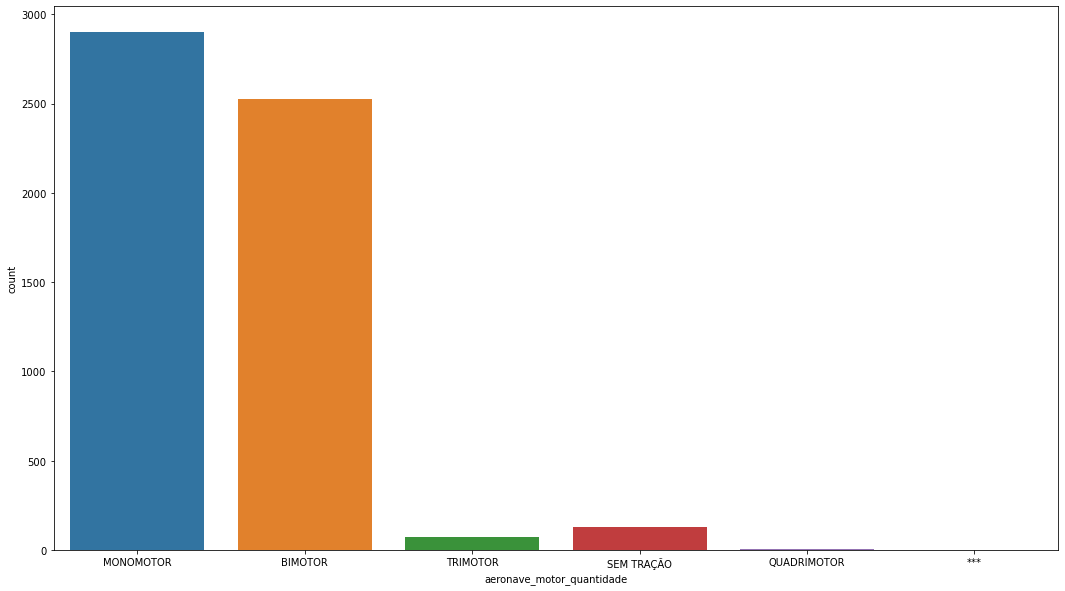

In [49]:
sns.countplot(df['aeronave_motor_quantidade'])

C:\Users\Murilo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='aeronave_tipo_veiculo', ylabel='count'>

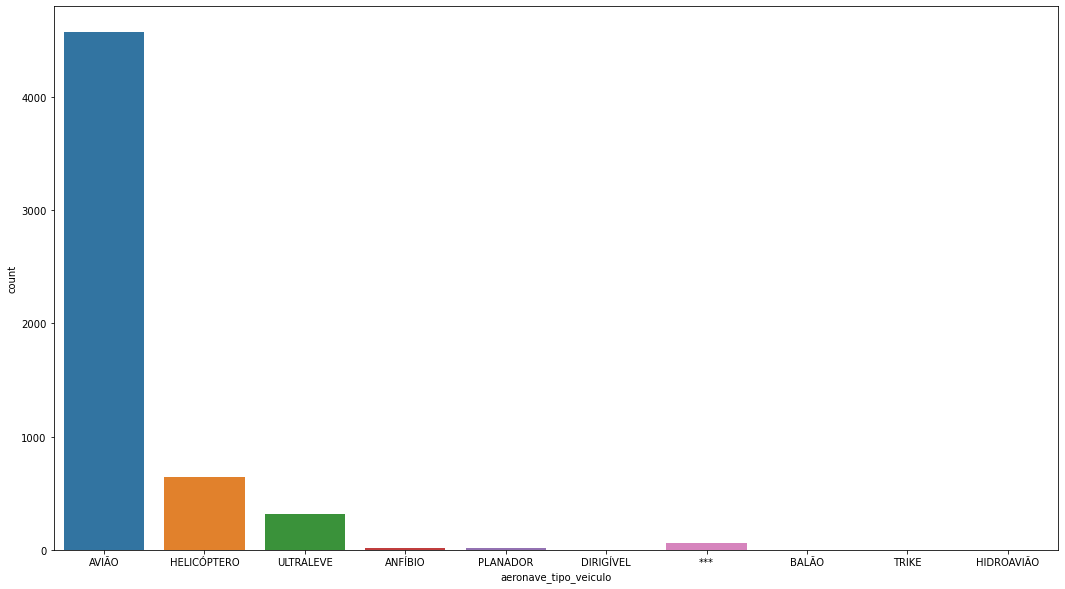

In [50]:
sns.countplot(df['aeronave_tipo_veiculo'])

C:\Users\Murilo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='aeronave_nivel_dano', ylabel='count'>

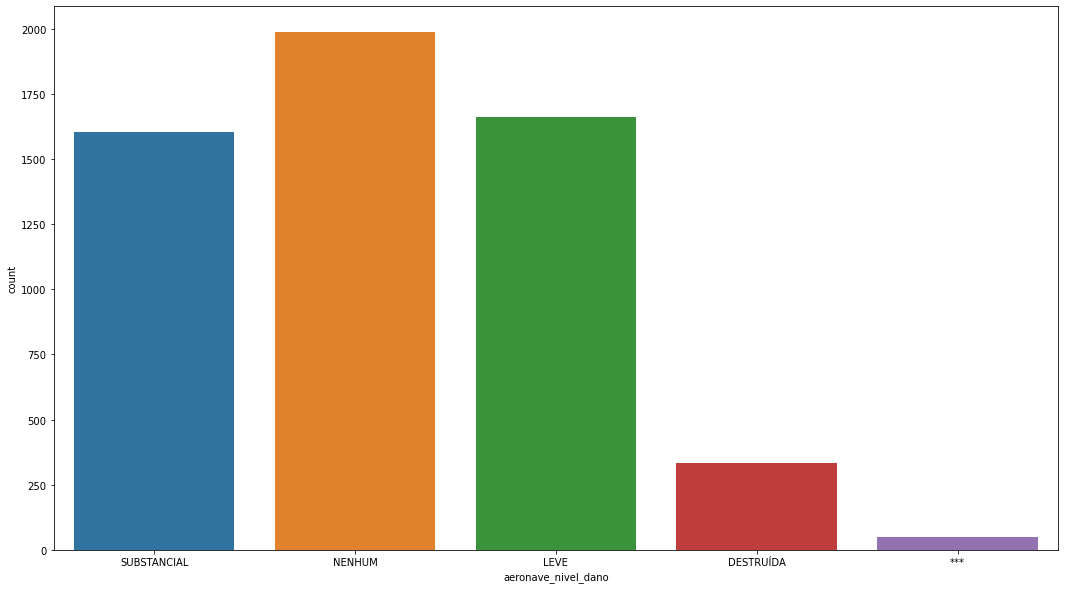

In [51]:
sns.countplot(df['aeronave_nivel_dano'])

C:\Users\Murilo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='aeronave_motor_tipo', ylabel='count'>

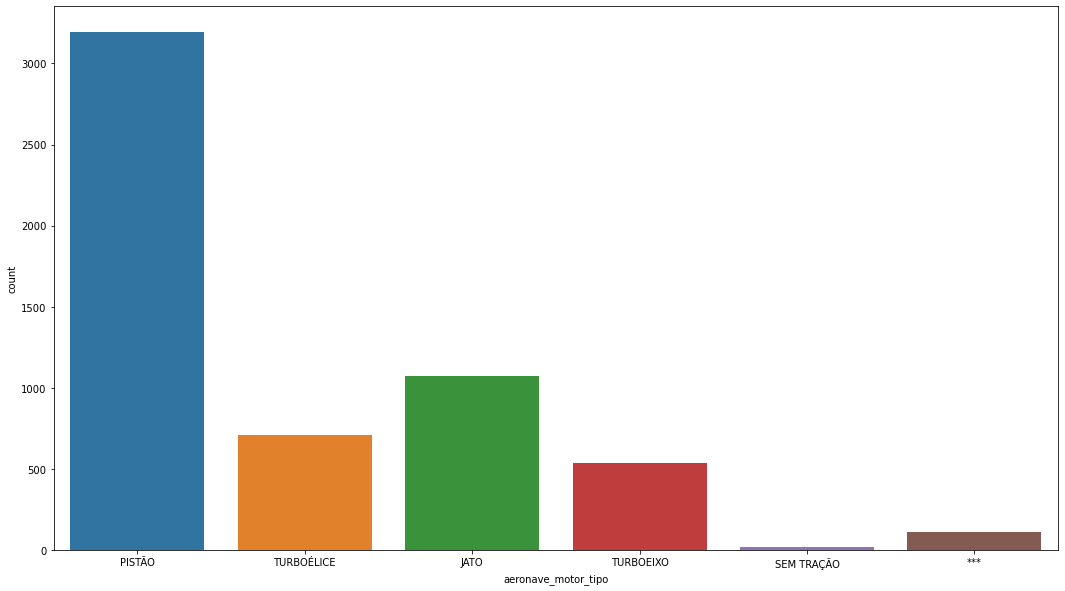

In [52]:
sns.countplot(df['aeronave_motor_tipo'])

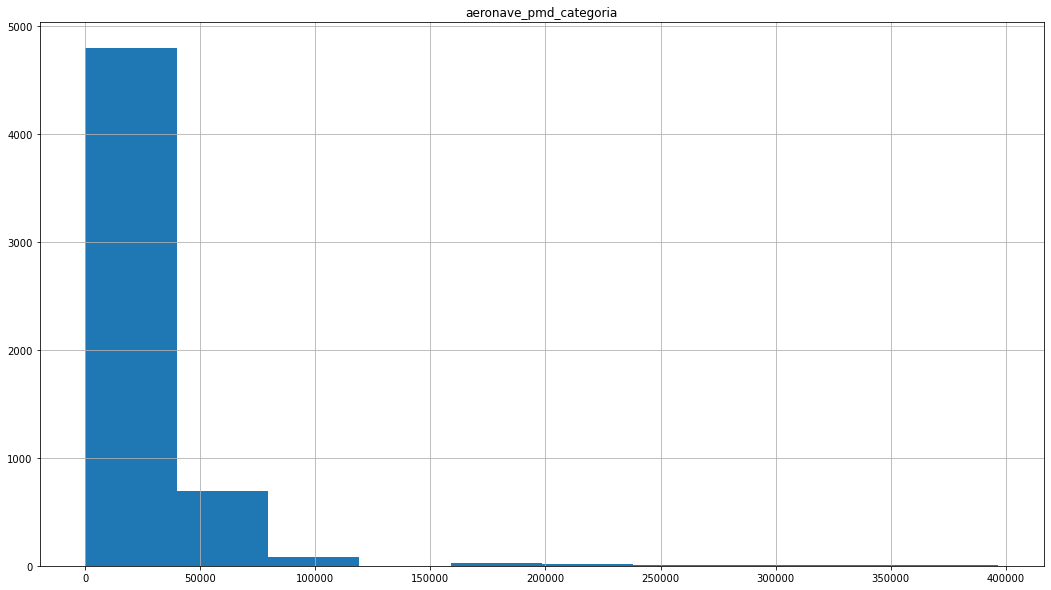

<Figure size 1296x720 with 0 Axes>

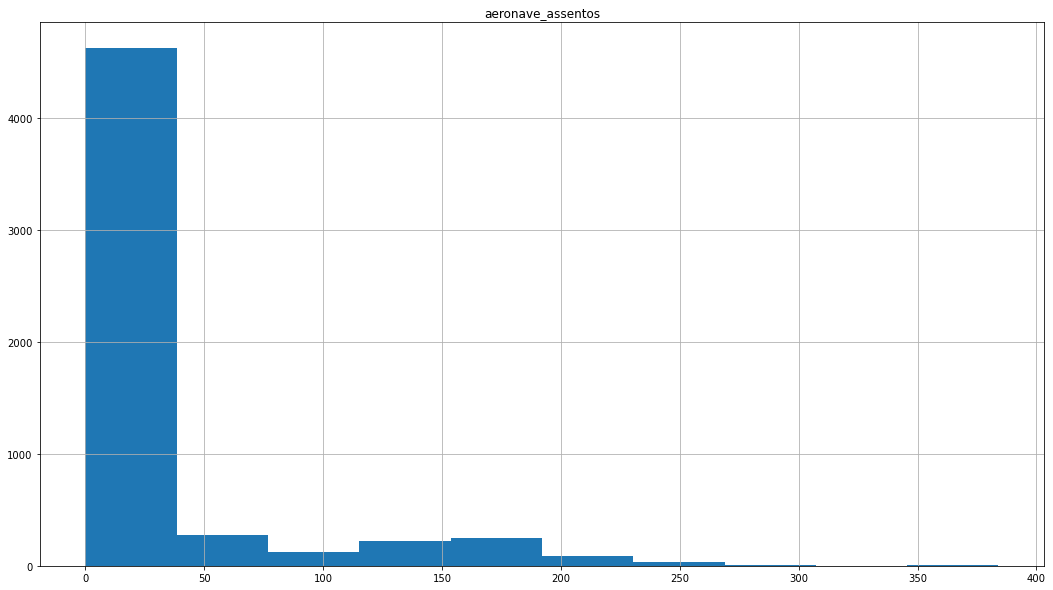

<Figure size 1296x720 with 0 Axes>

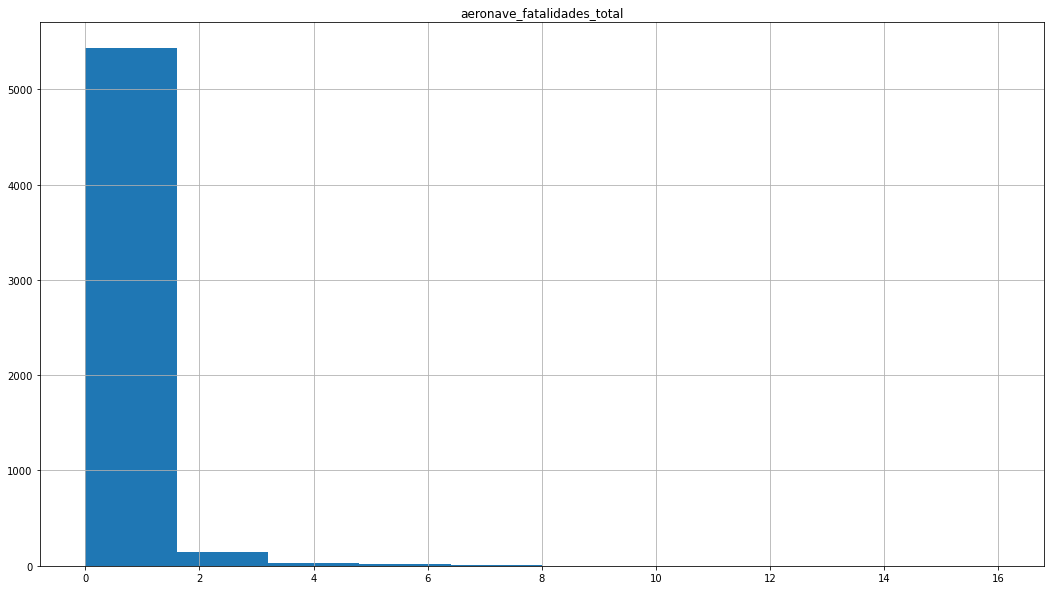

<Figure size 1296x720 with 0 Axes>

In [30]:
df_features =["aeronave_pmd_categoria","aeronave_assentos","aeronave_fatalidades_total"]
for i in df_features:
    df[df.columns].hist(i)
    plt.figure()

In [87]:
df.loc[df["aeronave_pmd_categoria"] ==0]

,codigo_ocorrencia2,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
126,40330,N245AY,***,AVIÃO,BOEING COMPANY,767-201,***,JATO,BIMOTOR,0,0,0.0,1987,ESTADOS UNIDOS,ESTADOS UNIDOS,AVIÃO,***,FORA DE AERODROMO,FORA DE AERODROMO,OUTRA FASE,***,NENHUM,0
166,40835,N3045P,***,HELICÓPTERO,ROBINSON HELICOPTER,R44 II,R44,TURBOEIXO,MONOMOTOR,0,0,0.0,2007,ESTADOS UNIDOS,ESTADOS UNIDOS,HELICÓPTERO,***,ROMEU ZEMA,MÁRIO DE ALMEIDA FRANCO,CRUZEIRO,***,NENHUM,0
237,41729,PUHRJ,EXPERIMENTAL,ULTRALEVE,FABRICACAO PROPRIA,TRIKE,ULAC,PISTÃO,MONOMOTOR,0,0,0.0,0,BRASIL,BRASIL,ULTRALEVE,EXPERIMENTAL,FORA DE AERODROMO,FORA DE AERODROMO,VOO A BAIXA ALTURA,EXPERIMENTAL,DESTRUÍDA,2
431,43155,PRBDF,PARTICULAR,AVIÃO,PIPER AIRCRAFT,PA-46R-350T,***,PISTÃO,MONOMOTOR,0,0,0.0,0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,CRUZEIRO,PRIVADA,NENHUM,0
581,43790,N300R,***,AVIÃO,EMBRAER,E55P,***,***,SEM TRAÇÃO,0,0,0.0,0,ESTADOS UNIDOS,ESTADOS UNIDOS,AVIÃO,***,FORA DE AERODROMO,FORA DE AERODROMO,POUSO,***,LEVE,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5684,79589,FAB5724,***,AVIÃO,***,***,***,***,SEM TRAÇÃO,0,0,0.0,0,BRASIL,BRASIL,AVIÃO,***,AUGUSTO SEVERO,PINTO MARTINS,APROXIMAÇÃO FINAL,***,NENHUM,0
5696,79607,PRZSL,***,***,***,***,***,***,SEM TRAÇÃO,0,0,0.0,0,BRASIL,BRASIL,***,EXPERIMENTAL,CAVU - CLUBE DE AVIAÇÃO ULTRALEVE,CATULEVE,SUBIDA,PRIVADA,SUBSTANCIAL,0
5732,79668,PRAKI,***,***,***,***,***,***,SEM TRAÇÃO,0,0,0.0,0,BRASIL,BRASIL,***,REGULAR,VAL DE CANS / JÚLIO CEZAR RIBEIRO,MARECHAL CUNHA MACHADO,DESCIDA,REGULAR,LEVE,0
5753,79694,PSAEC,***,AVIÃO,EMBRAER,ERJ 190-400,***,***,SEM TRAÇÃO,0,0,0.0,0,BRASIL,BRASIL,AVIÃO,REGULAR,PRESIDENTE JUSCELINO KUBITSCHEK,VIRACOPOS,CRUZEIRO,REGULAR,NENHUM,0


In [126]:
df.loc[df["aeronave_assentos"] == 0.0]

,codigo_ocorrencia2,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total


In [127]:
df1 = df["aeronave_pmd_categoria"]
df2 = df["aeronave_assentos"]

In [128]:
df1 = df1.drop(df1.loc[df1 == 0])
df2 = df2.drop(df2.loc[df2 == 0.0])


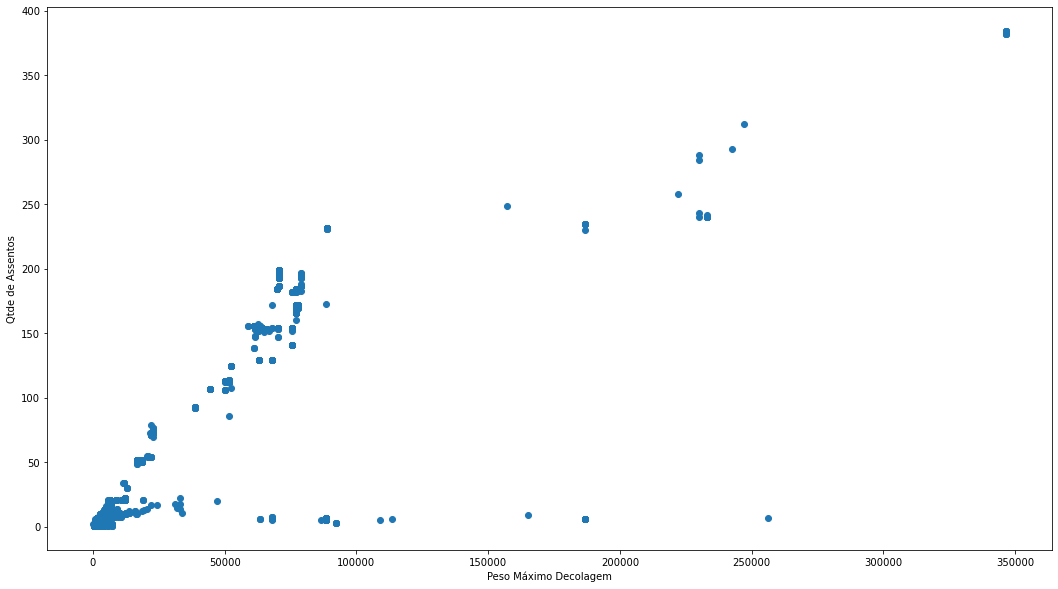

In [129]:
plt.scatter(x=df1, y=df2) #x = pmd,y = assentos
plt.xlabel("Peso Máximo Decolagem")
plt.ylabel("Qtde de Assentos")
plt.show()

### Feature Engineering

In [79]:
#train_df.groupby('AgeCategory')['EstimatedSalary'].mean()
df.groupby("aeronave_assentos")["aeronave_pmd_categoria"].min()

aeronave_assentos
0.0           0
1.0           0
2.0          35
3.0         770
4.0           0
          ...  
288.0    230000
293.0    242671
312.0    247200
382.0    346544
384.0    346544
Name: aeronave_pmd_categoria, Length: 87, dtype: int64

In [85]:
df.groupby("aeronave_motor_quantidade")["aeronave_pmd_categoria"].mean()

aeronave_motor_quantidade
***               750.000000
BIMOTOR         28207.817894
MONOMOTOR        1427.703103
QUADRIMOTOR    224878.714286
SEM TRAÇÃO       5246.776923
TRIMOTOR       101372.263889
Name: aeronave_pmd_categoria, dtype: float64